<a href="https://colab.research.google.com/github/smomtahe/ensemble-learning-absorption/blob/main/absorption_ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

absorption1_pred_scaled=
[ 0.04590815481767234,0.04590815481767234,0.04590815481767234,0.04590815481767234,0.04590815481767234,0.04590815481767234,0.04590815481767234,0.04589634088388759,0.04589606011070314,0.04589564004165497,0.04123790206161748,0.036359310792822876,0.029698226591013826,0.0238911795633473,0.018269042757818637,0.010147561359796227,0.008440877401807191,0.0,0.0007728425498004498,0.00693336754001739,0.007621456446099293,0.01069777816159156,0.011301288352654537,0.013698082745011185,0.014129714966428498,0.017474760371455917,0.015495925922441513,0.016289824900102796,0.022185934268770795,0.01701537854350128,0.0367862764061704,0.04498998385384754,0.06698820566804496,0.08302905559732662,0.11265974687210771,0.12190531532949272,0.12805786117664886,0.14415775769967867,0.15635160675685078,0.1770279425715083,0.18118139930874935,0.20265329727267706,0.21580777104500024,0.23299413173464661,0.2391170241242807,0.2463408537493059,0.25905142001333925,0.2629244510774226,0.26848394696433137,

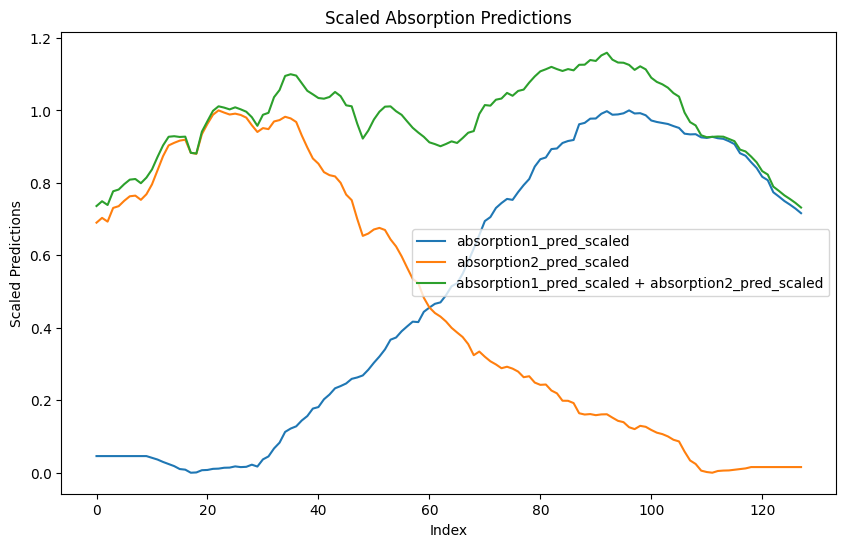

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import BaggingRegressor

# Train set:
# Load data from CSV file
train_url = "https://raw.githubusercontent.com/smomtahe/ensemble-learning-absorption/main/phantom.csv"
train_data = pd.read_csv(train_url)

# Test set:
# Load data from CSV file
test_url = "https://raw.githubusercontent.com/maryammomtahen/Testset/main/P31_S5_U_pre.csv"
test_data = pd.read_csv(test_url)

# Select features
features = ['pixel', 'reflectance1', 'reflectance2']

X_train = train_data[features]
y_train = train_data[['absorption1', 'absorption2', 'side']]

X_test = test_data[features]

# Normalize the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the base KNN regressor
base_regressor = KNeighborsRegressor(n_neighbors=4, weights='distance')

# Create and train the Bagging regressor with KNN as the base estimator
regressor = BaggingRegressor(base_regressor, n_estimators=10)
regressor.fit(X_train_scaled, y_train)

# Predict on the test dataset using the test set features
y_pred = regressor.predict(X_test_scaled)

# Separate the predicted values for absorption1, absorption2, and side
absorption1_pred = y_pred[:, 0]  # Predicted absorption1 values
absorption2_pred = y_pred[:, 1]  # Predicted absorption2 values
side_pred = y_pred[:, 2]  # Predicted side values

# Find the most frequent side value
most_frequent_side = int(round(side_pred.mean()))

# Map the most frequent side value to the corresponding label
side_label = ""
if most_frequent_side == 0:
    side_label = "Left"
elif most_frequent_side == 1:
    side_label = "Center"
elif most_frequent_side == 2:
    side_label = "Right"

# Scale absorption1_pred and absorption2_pred between 0 and 1
absorption1_pred_scaled = (absorption1_pred - absorption1_pred.min()) / (absorption1_pred.max() - absorption1_pred.min())
absorption2_pred_scaled = (absorption2_pred - absorption2_pred.min()) / (absorption2_pred.max() - absorption2_pred.min())

print("absorption1_pred_scaled=")  # Predicted values for absorption1
print('[', ','.join(str(value) for value in absorption1_pred_scaled), '];')
print("absorption2_pred_scaled=")  # Predicted values for absorption2
print('[', ','.join(str(value) for value in absorption2_pred_scaled), '];')
print("most_frequent_side_label=")  # Most frequent predicted side label
print(side_label)

# Calculate the maximum value of absorption1_pred_scaled + absorption2_pred_scaled
max_combined_pred = (absorption1_pred_scaled + absorption2_pred_scaled).max()

# Generate the report
report = f"Maximum value of (absorption1_pred_scaled + absorption2_pred_scaled): {max_combined_pred:.4f}"
print(report)

# Plot absorption1_pred_scaled, absorption2_pred_scaled, and absorption1_pred_scaled + absorption2_pred_scaled
plt.figure(figsize=(10, 6))
plt.plot(absorption1_pred_scaled, label='absorption1_pred_scaled')
plt.plot(absorption2_pred_scaled, label='absorption2_pred_scaled')
plt.plot(absorption1_pred_scaled + absorption2_pred_scaled, label='absorption1_pred_scaled + absorption2_pred_scaled')
plt.xlabel("Index")
plt.ylabel("Scaled Predictions")
plt.title("Scaled Absorption Predictions")
plt.legend()
plt.show()